In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.optimize import minimize
import plotly.figure_factory as ff
import plotly.express as px
from ipywidgets import VBox, HBox, Output, Button, IntText, Label, FloatText
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
import matplotlib.animation as animation
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

kospi = pd.read_excel("C:/Users/DOHS/Desktop/자산배분/6years_earning_ratio.xlsx", index_col=0) # 코스피 수정주가 데이터(2018.04.02~2024.04.04)
kospi

,A005930,A000660,A373220,A207940,A005380,A000270,A068270,A005490,A035420,A006400,...,A025620,A025890,A001210,A088790,A010420,A005110,A001770,A030790,A071950,A008500
Symbol,,,,,,,,,,,,,,,,,,,,,
2018-04-02,48540,81300,NaN,480312,148500,31200,264853,327500,157223,199500,...,302402,2395,7470,5430,1345,6643,19223,73170,1555,24360
2018-04-03,48120,81800,NaN,479818,152000,31750,260497,325000,157223,197500,...,324855,2365,7450,5390,1345,6753,20246,73652,1630,23779
2018-04-04,46920,80400,NaN,497113,156500,32550,256141,317500,151014,189500,...,324153,2350,7380,5400,1380,7443,19534,72880,1630,23721
2018-04-05,48740,82900,NaN,496125,154000,32350,257012,318500,156021,191000,...,306612,2395,7340,5440,1415,7364,19223,75776,1590,24767
2018-04-06,48400,80300,NaN,512926,152500,32050,254398,319000,154219,191000,...,312927,2390,7380,5440,1400,7787,18956,75293,1590,24477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-29,82400,183000,395000.0,831000,233000,110200,191200,422000,187400,471000,...,6740,2550,731,2085,1205,1254,19070,904,511,12140
2024-04-01,82000,185500,395500.0,816000,227500,108700,188100,418000,194300,454000,...,6450,2505,736,2165,1204,1254,19130,904,499,12820
2024-04-02,85000,186300,393000.0,816000,220000,104700,183800,409500,192000,453000,...,6420,2485,728,2175,1231,1254,18910,904,494,12840


In [72]:
kospi = kospi.loc["2023-04-02":]
kospi

,A005930,A000660,A373220,A207940,A005380,A000270,A068270,A005490,A035420,A006400,...,A025620,A025890,A001210,A088790,A010420,A005110,A001770,A030790,A071950,A008500
Symbol,,,,,,,,,,,,,,,,,,,,,
2023-04-03,63100,87200,586000.0,778000,183600,81200,150000,392000,198200,745000,...,7640,3380,930,3020,1502,3148,32350,904,687,15000
2023-04-04,63600,84500,575000.0,788000,183800,80100,159000,367000,201000,726000,...,7990,3190,936,3070,1506,3444,33100,904,703,15000
2023-04-05,63900,84600,588000.0,788000,186700,81300,158600,373500,199200,778000,...,8030,3120,923,3130,1497,3360,32550,904,697,15000
2023-04-06,62300,83800,580000.0,805000,185100,81000,159500,362500,191900,745000,...,7990,3285,910,3075,1459,3256,33150,904,687,15000
2023-04-07,65000,89100,580000.0,796000,185100,80100,159500,369500,193400,738000,...,8030,3300,933,3090,1459,3252,32200,904,690,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-29,82400,183000,395000.0,831000,233000,110200,191200,422000,187400,471000,...,6740,2550,731,2085,1205,1254,19070,904,511,12140
2024-04-01,82000,185500,395500.0,816000,227500,108700,188100,418000,194300,454000,...,6450,2505,736,2165,1204,1254,19130,904,499,12820
2024-04-02,85000,186300,393000.0,816000,220000,104700,183800,409500,192000,453000,...,6420,2485,728,2175,1231,1254,18910,904,494,12840


In [73]:
df = (kospi - kospi.shift(1))/kospi.shift(1)*100
df = df.iloc[1:]
df

,A005930,A000660,A373220,A207940,A005380,A000270,A068270,A005490,A035420,A006400,...,A025620,A025890,A001210,A088790,A010420,A005110,A001770,A030790,A071950,A008500
Symbol,,,,,,,,,,,,,,,,,,,,,
2023-04-04,0.792393,-3.096330,-1.877133,1.285347,0.108932,-1.354680,6.000000,-6.377551,1.412714,-2.550336,...,4.581152,-5.621302,0.645161,1.655629,0.266312,9.402795,2.318393,0.0,2.328967,0.000000
2023-04-05,0.471698,0.118343,2.260870,0.000000,1.577802,1.498127,-0.251572,1.771117,-0.895522,7.162534,...,0.500626,-2.194357,-1.388889,1.954397,-0.597610,-2.439024,-1.661631,0.0,-0.853485,0.000000
2023-04-06,-2.503912,-0.945626,-1.360544,2.157360,-0.856990,-0.369004,0.567465,-2.945114,-3.664659,-4.241645,...,-0.498132,5.288462,-1.408451,-1.757188,-2.538410,-3.095238,1.843318,0.0,-1.434720,0.000000
2023-04-07,4.333868,6.324582,0.000000,-1.118012,0.000000,-1.111111,0.000000,1.931034,0.781657,-0.939597,...,0.500626,0.456621,2.527473,0.487805,0.000000,-0.122850,-2.865762,0.0,0.436681,0.000000
2023-04-10,1.076923,1.795735,2.758621,0.879397,0.432199,1.123596,2.758621,7.848444,-0.206825,1.490515,...,-6.475716,-3.333333,-1.822079,0.647249,-0.274160,5.781058,-2.173913,0.0,-2.318841,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-29,1.980198,2.693603,-1.618929,-0.240096,-1.687764,-1.607143,4.026115,0.237530,0.160342,-1.361257,...,1.049475,-0.778210,-0.408719,-0.477327,-2.112104,0.000000,-2.104723,0.0,-0.776699,-1.300813
2024-04-01,-0.485437,1.366120,0.126582,-1.805054,-2.360515,-1.361162,-1.621339,-0.947867,3.681964,-3.609342,...,-4.302671,-1.764706,0.683995,3.836930,-0.082988,0.000000,0.314630,0.0,-2.348337,5.601318
2024-04-02,3.658537,0.431267,-0.632111,0.000000,-3.296703,-3.679853,-2.286018,-2.033493,-1.183736,-0.220264,...,-0.465116,-0.798403,-1.086957,0.461894,2.242525,0.000000,-1.150026,0.0,-1.002004,0.156006


In [74]:
df.dropna(axis=1, inplace=True)
df = df.iloc[:, :3]

In [75]:
mean_return = df.mean(axis=0)
cov_matrix = np.cov(df, rowvar = False)

In [76]:
cov_matrix

array([[1.86626114, 1.54454675, 0.48108799],
       [1.54454675, 5.29559404, 1.02273444],
       [0.48108799, 1.02273444, 7.314695  ]])

In [145]:
# 포트폴리오 리턴과 변동성 계산 함수
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return std, returns

In [78]:
# 목적 함수 (최소화할 함수: 샤프 비율의 음수값) - 목적함수 minimize
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.0362):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [124]:
# 초기 가중치 설정
initial_weights = np.array([1./len(df.columns) for asset in range(len(df.columns))])

In [125]:
# 가중치 범위 (0과 1 사이)
bounds = tuple((0, 1) for asset in range(len(df.columns)))

In [126]:
# 최적화 제약 조건 (모든 가중치 합은 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [165]:
# RE 최적화 실행
risk_free_rate=0.0362/365
def resampled_efficiency_optimization(n_iterations=10000):
    results = np.zeros((n_iterations, len(df.columns)))
    results_point = np.zeros((3, n_iterations))
    weights_record = []
    for i in range(n_iterations):
        # 표본 추출된 수익률과 공분산 행렬
        sampled_returns =  df.apply(lambda x: np.random.choice(x, 1000)).values
        sampled_mean_returns = sampled_returns.mean(axis=0)
        sampled_cov_matrix = np.cov(sampled_returns, rowvar=False)
        
        # 최적화
        opt_results = minimize(neg_sharpe_ratio, initial_weights, args=(sampled_mean_returns, sampled_cov_matrix),
                               method='SLSQP', bounds=bounds, constraints=constraints)
        
        results[i, :] = opt_results.x
        weights_record.append(results[i, :])
        portfolio_std_dev, portfolio_return = portfolio_performance(results[i, :], sampled_mean_returns, sampled_cov_matrix)
        results_point[0,i] = portfolio_std_dev
        results_point[1,i] = portfolio_return
        results_point[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results.mean(axis=0), results, weights_record, results_point

# 최적 가중치 계산
optimal_weights, results, weights_record, results_point = resampled_efficiency_optimization()
print("Optimal Weights:\n", optimal_weights)

Optimal Weights:
 [0.45289583 0.54623664 0.00086753]


# PyPortfolioOpt

In [168]:
# Calculate expected returns and sample covariance
mean_returns = mean_return
cov_matrix = pd.DataFrame(cov_matrix)
cov_matrix.columns = df.columns
cov_matrix.index = df.columns
risk_free_rate=0.0362/365
num_portfolios = 10000

In [60]:
cov_matrix

,A005930,A000660,A373220
A005930,1.866261,1.544547,0.481088
A000660,1.544547,5.295594,1.022734
A373220,0.481088,1.022734,7.314695


In [174]:
def display_simulated_ef_with_random():
    optimal_weights, results, weights_record, results_point = resampled_efficiency_optimization()
    weights = weights_record   
        
    max_sharpe_idx = np.argmax(results_point[2])
    sdp, rp = results_point[0,max_sharpe_idx], results_point[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results_point[0])
    sdp_min, rp_min = results_point[0,min_vol_idx], results_point[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results_point[0,:],results_point[1,:],c=results_point[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.47
Annualised Volatility: 1.51


            A005930  A000660  A373220
allocation    43.24    56.76      0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.07
Annualised Volatility: 1.08


            A005930  A000660  A373220
allocation    82.72    17.28      0.0


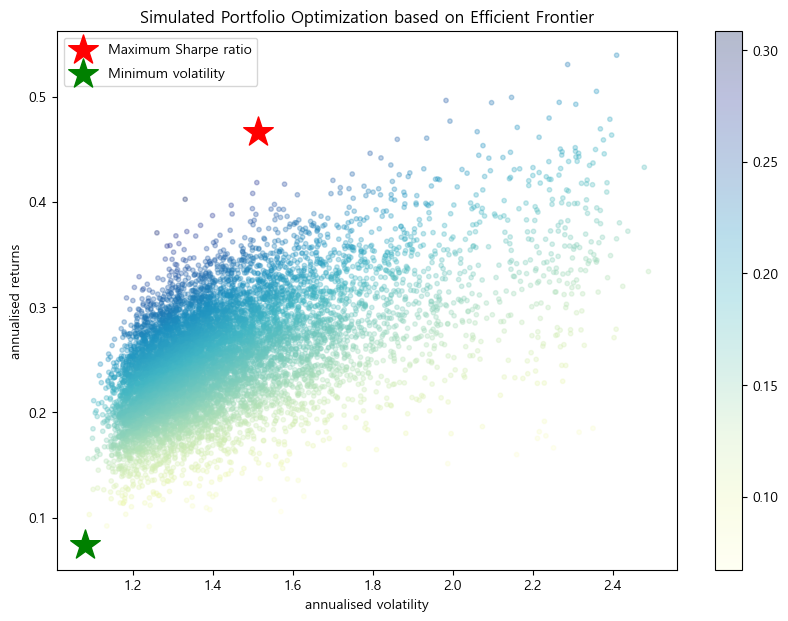

In [175]:
display_simulated_ef_with_random()